In [1]:
import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

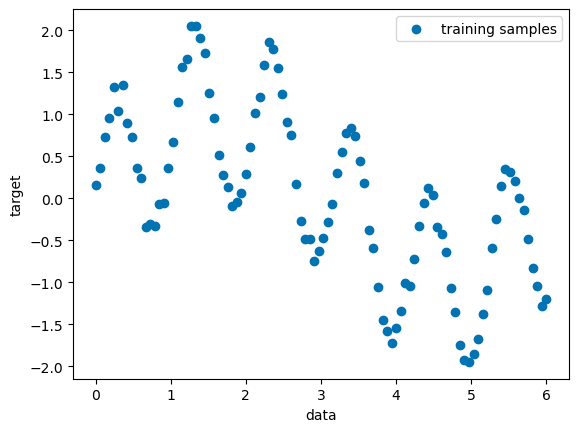

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.xlabel("data")
plt.ylabel("target")
# plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [10]:
X.shape, y.shape

((100, 1), (100,))

In [4]:
y

array([ 0.16243454,  0.35506848,  0.73293321,  0.96056821,  1.31984792,
        1.03781588,  1.34921854,  0.89696071,  0.72839089,  0.36311059,
        0.24101479, -0.34444676, -0.30720656, -0.329436  , -0.06555603,
       -0.05805642,  0.35904563,  0.6684755 ,  1.15054122,  1.55749478,
        1.66207538,  2.04679222,  2.05145522,  1.90756398,  1.72564365,
        1.25778015,  0.95793557,  0.52093983,  0.27848881,  0.13524791,
       -0.09587277, -0.04856934,  0.06249217,  0.28820394,  0.61394944,
        1.01124939,  1.20814475,  1.58217296,  1.85921717,  1.77503277,
        1.55600875,  1.23834863,  0.90835949,  0.7510826 ,  0.17445009,
       -0.27082498, -0.48627073, -0.48345353, -0.74216084, -0.62523488,
       -0.47813412, -0.28399902, -0.06467433,  0.30524975,  0.55645425,
        0.78103961,  0.83261336,  0.73850934,  0.44710333,  0.17908067,
       -0.37816431, -0.59149331, -1.05282155, -1.45029984, -1.58182951,
       -1.72061187, -1.54921792, -1.33851419, -1.00617712, -1.04

In [34]:
from sklearn.linear_model import RidgeCV

model = RidgeCV(alphas=[0.001, 0.1, 1, 10, 100], cv=5)

model.fit(X, y)

pred_ridge = model.predict(X)

In [35]:
to_full_plot = np.linspace(X[0, 0] - 1, 
                           X[-1, 0] + 1, 
                           1000)

pred_ridge = model.predict(to_full_plot.reshape(-1, 1))

In [36]:
X[:, 0].min()

0.0

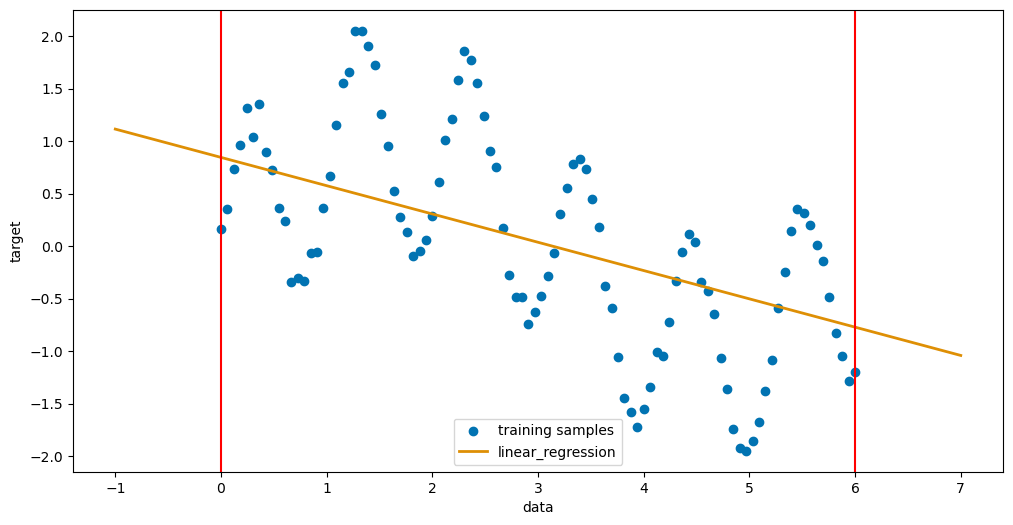

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color=colors[0], label="training samples")
plt.xlabel("data")
plt.ylabel("target")
plt.plot(to_full_plot, pred_ridge, color=colors[1], label="linear_regression", linewidth=2)
# plt.title("Decision Tree Regression")
plt.axvline(X[:, 0].min(), c='r')
plt.axvline(X[:, 0].max(), c='r')
plt.legend()
plt.show()

- ¿ Captura la regresión lineal correctamente el comportamiento local en los tramos de la nube de puntos? **NO**, es inflexible y no logra capturar estos comportamientos.
- ¿ Captura la regresión lineal correctamente la tendencia de los datos y el comportamiento global? **SI**, el modelo ha capturado correctamente una tendencia a  la baja de la nube de puntos global.
- ¿ Funciona aparentemente correctamente la extrapolación capturando la tendencia fuera de la zona de la nube de puntos conocida? **SI, PERO** usar el modelo fuera de la zona donde tenemos los registros de los datos es jugar a doble o NADA.

In [49]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    max_leaf_nodes=2 ** 6, 
    min_samples_leaf=10
)

model.fit(X, y)

pred_tree = model.predict(to_full_plot.reshape(-1, 1))

y = m * x + n

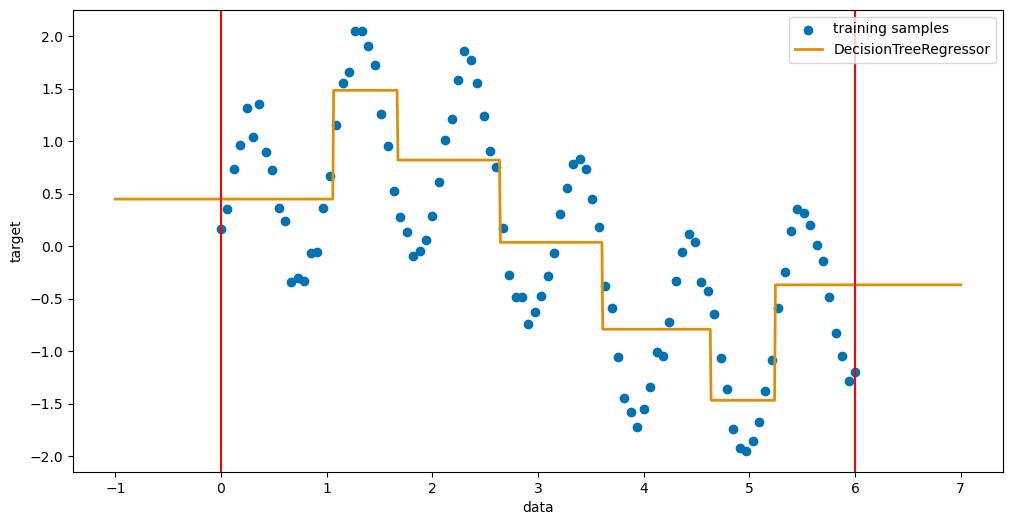

In [50]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color=colors[0], label="training samples")
plt.xlabel("data")
plt.ylabel("target")
plt.plot(to_full_plot, pred_tree, color=colors[1], label="DecisionTreeRegressor", linewidth=2)
# plt.title("Decision Tree Regression")
plt.axvline(X[:, 0].min(), c='r')
plt.axvline(X[:, 0].max(), c='r')
plt.legend()
plt.show()

- ¿ Captura el árbol de decisión correctamente el comportamiento local en los tramos de la nube de puntos? **SI**, es un modelo capaz de capturar la localización en los datos
- ¿ Captura el árbol de decisión correctamente la tendencia de los datos y el comportamiento global? **NO**, no captura el comportamiento global ya que es una función constante a trozos, en cada trozo (O NODO), vale la media de los puntos de dato que están en el nodo, sin capturar ninguna tendencia o evolución en el nodo o los que le rodean. Además, estos saltos en las predicciones, generan una variabilidad amplia, y puntos cercanos pueden tener predicciones muy alejadas, lo que no es algo bueno.
- ¿ Funciona aparentemente correctamente la extrapolación capturando la tendencia fuera de la zona de la nube de puntos conocida? **NO**, el árbol de decisión **NUNCA CAPTURA UNA TENDENCIA**

# Regresión polinómica

In [62]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', RidgeCV(alphas=[0.001, 0.1, 1, 10, 100], cv=5))
])

pipe.fit(X, y)

pred_ridge = pipe.predict(X)

In [63]:
import pandas as pd

df = pd.DataFrame({'a': [1, 2, 3]})
df

,a
0,1
1,2
2,3


In [65]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
poly_feat.fit_transform(df)

array([[1., 1.],
       [2., 4.],
       [3., 9.]])

In [67]:
pred_ridge = pipe.predict(to_full_plot.reshape(-1, 1))

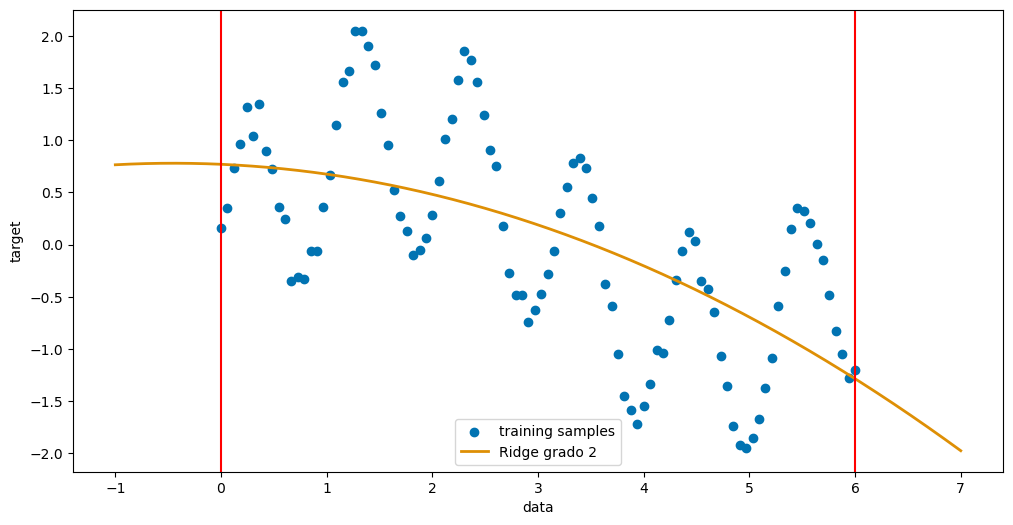

In [68]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color=colors[0], label="training samples")
plt.xlabel("data")
plt.ylabel("target")
plt.plot(to_full_plot, pred_ridge, color=colors[1], label="Ridge grado 2", linewidth=2)
# plt.title("Decision Tree Regression")
plt.axvline(X[:, 0].min(), c='r')
plt.axvline(X[:, 0].max(), c='r')
plt.legend()
plt.show()

In [69]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('ridge', RidgeCV(alphas=[0.001, 0.1, 1, 10, 100], cv=5))
])

pipe.fit(X, y)

pred_ridge = pipe.predict(X)

In [70]:
pred_ridge = pipe.predict(to_full_plot.reshape(-1, 1))

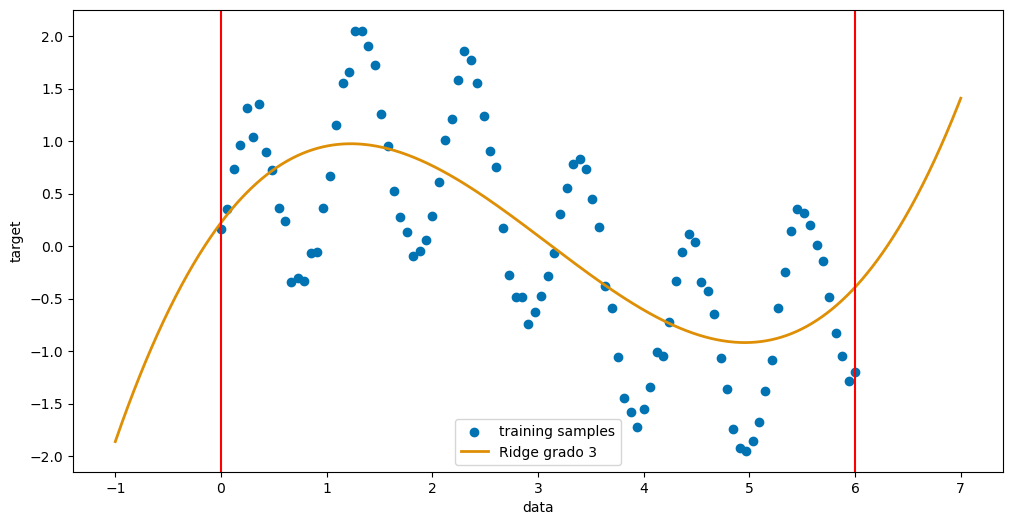

In [72]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color=colors[0], label="training samples")
plt.xlabel("data")
plt.ylabel("target")
plt.plot(to_full_plot, pred_ridge, color=colors[1], label="Ridge grado 3", linewidth=2)
# plt.title("Decision Tree Regression")
plt.axvline(X[:, 0].min(), c='r')
plt.axvline(X[:, 0].max(), c='r')
plt.legend()
plt.show()